In [37]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [38]:

df = pd.read_csv("2013_movies.csv")

In [39]:

df["tester"] = df.Budget*0 +1
df.fillna(0, inplace=True)
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,tester
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00,1.0
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00,1.0
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00,1.0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00,1.0
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00,1.0


In [40]:
y = df.Runtime
X = np.ones([len(y),1])
model = sm.OLS(y, X) 
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Runtime   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 10 Oct 2016   Prob (F-statistic):                nan
Time:                        15:13:24   Log-Likelihood:                -431.48
No. Observations:                 100   AIC:                             865.0
Df Residuals:                      99   BIC:                             867.6
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        112.2600      1.819     61.713      0.000       108.651   115.869
==============================================================================
Omnibus:                       11.447   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.285
Skew:                           0.699   Prob(JB):                      0.00215
Kurtosis:                       3.998   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
from sklearn import metrics
y_pred = fit.predict(X)
print(metrics.r2_score(y, y_pred))

0.0


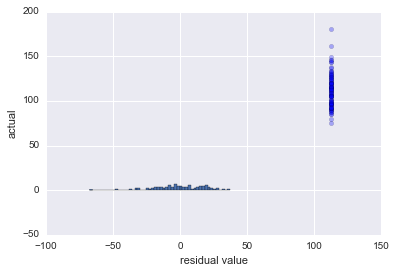

In [42]:
plt.scatter(y_pred, y, alpha = .3)
plt.xlabel('prediction')
plt.ylabel('actual');

plt.hist(y_pred-y,bins = 50)
plt.xlabel('residual value');

In [44]:
y = df.Runtime
X = pd.concat([df.tester, df.Budget], axis=1)

model = sm.OLS(y, X) 
fit = model.fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Runtime   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     340.2
Date:                Mon, 10 Oct 2016   Prob (F-statistic):           7.96e-45
Time:                        15:13:40   Log-Likelihood:                -511.65
No. Observations:                 100   AIC:                             1027.
Df Residuals:                      98   BIC:                             1033.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
tester       104.6292      6.967     15.018      0.000        90.804   118.455
Budget      1.055e-07   7.31e-08      1.443      0.152     -3.96e-08  2.51e-07
==============================================================================
Omnibus:                       48.445   Durbin-Watson:                   1.394
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.593
Skew:                           1.952   Prob(JB):                     4.33e-24
Kurtosis:                       6.254   Cond. No.                     1.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
y_pred = fit.predict(X)
print(metrics.r2_score(y, y_pred))




-3.96918555029


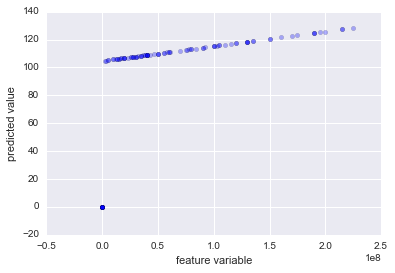

In [48]:
plt.scatter(X.iloc[:,1], y_pred, alpha = .3)
plt.xlabel('feature variable')
plt.ylabel('predicted value');


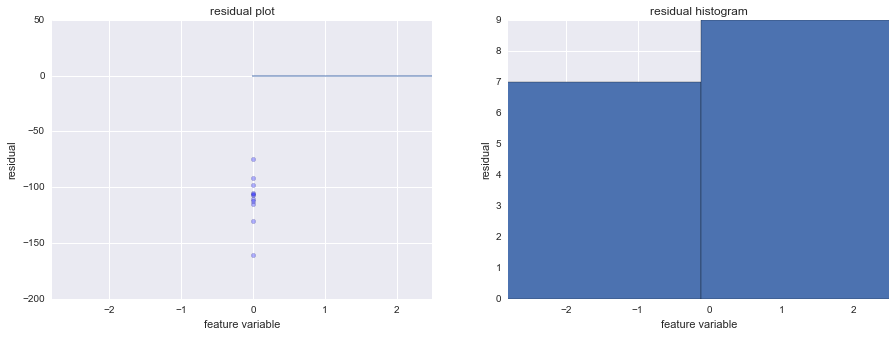

In [49]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(X.iloc[:,1],X.iloc[:,1]*0,alpha = .5)
plt.scatter(X.iloc[:,1], y_pred-y, alpha = .3)
plt.xlabel('feature variable')
plt.ylabel('residual')
plt.xlim([-2.8,2.5])
plt.title('residual plot');

plt.subplot(1,2,2)
plt.hist(y_pred-y,bins = 50)
plt.xlabel('feature variable')
plt.ylabel('residual')
plt.xlim([-2.8,2.5])
plt.title('residual histogram');


In [51]:

y = df.Runtime
X = pd.concat([df.tester, df.Budget, pd.get_dummies(df.Rating)], axis=1)

model = sm.OLS(y, X) 
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Runtime   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     5.551
Date:                Mon, 10 Oct 2016   Prob (F-statistic):           0.000159
Time:                        15:17:43   Log-Likelihood:                -418.55
No. Observations:                 100   AIC:                             849.1
Df Residuals:                      94   BIC:                             864.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
tester        -3.8607      6.028     -0.640      0.523       -15.829     8.107
Budget      1.195e-07   3.28e-08      3.642      0.000      5.43e-08  1.85e-07
G            107.0000     16.403      6.523      0.000        74.432   139.568
PG            92.5736      6.998     13.229      0.000        78.680   106.468
PG-13        110.8116      5.425     20.425      0.000       100.039   121.584
R            110.0326      5.709     19.272      0.000        98.696   121.369
==============================================================================
Omnibus:                       15.938   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.002
Skew:                           0.740   Prob(JB):                     1.01e-05
Kurtosis:                       4.824   Cond. No.                     8.99e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.99e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
y_pred = fit.predict(X)
print(metrics.r2_score(y, y_pred))

0.227972955852


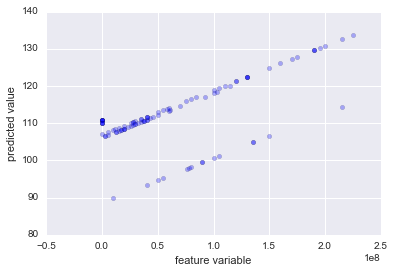

In [53]:
plt.scatter(X.iloc[:,1], y_pred, alpha = .3)
plt.xlabel('feature variable')
plt.ylabel('predicted value');

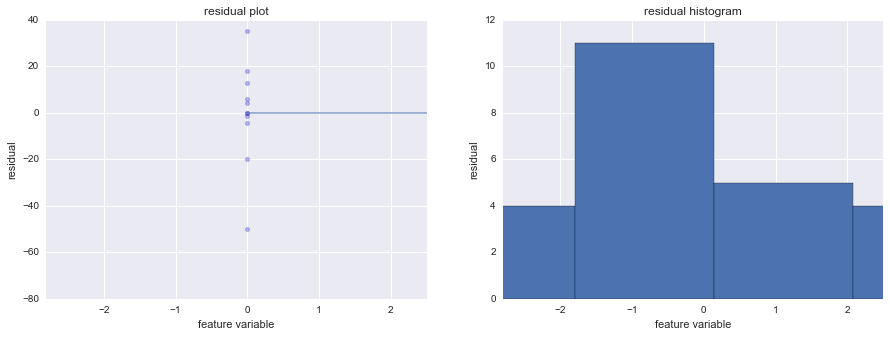

In [54]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(X.iloc[:,1],X.iloc[:,1]*0,alpha = .5)
plt.scatter(X.iloc[:,1], y_pred-y, alpha = .3)
plt.xlabel('feature variable')
plt.ylabel('residual')
plt.xlim([-2.8,2.5])
plt.title('residual plot');

plt.subplot(1,2,2)
plt.hist(y_pred-y,bins = 50)
plt.xlabel('feature variable')
plt.ylabel('residual')
plt.xlim([-2.8,2.5])
plt.title('residual histogram');

In [55]:
y = df.Runtime
X = pd.concat([df.tester, df.Budget, pd.get_dummies(df.Rating), df.DomesticTotalGross], axis=1)

model = sm.OLS(y, X) 
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Runtime   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     5.496
Date:                Mon, 10 Oct 2016   Prob (F-statistic):           6.60e-05
Time:                        15:20:35   Log-Likelihood:                -416.31
No. Observations:                 100   AIC:                             846.6
Df Residuals:                      93   BIC:                             864.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
tester                -3.0214      5.940     -0.509      0.612       -14.817     8.774
Budget              8.444e-08   3.64e-08      2.318      0.023      1.21e-08  1.57e-07
G                     94.5855     17.211      5.496      0.000        60.407   128.764
PG                    88.9595      7.099     12.531      0.000        74.862   103.057
PG-13                107.8767      5.520     19.542      0.000        96.915   118.839
R                    107.2659      5.771     18.588      0.000        95.806   118.726
DomesticTotalGross  4.624e-08   2.24e-08      2.064      0.042      1.74e-09  9.07e-08
==============================================================================
Omnibus:                       13.350   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.296
Skew:                           0.645   Prob(JB):                     0.000106
Kurtosis:                       4.652   Cond. No.                     1.63e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
y_pred = fit.predict(X)
print(metrics.r2_score(y, y_pred))

0.261775208942


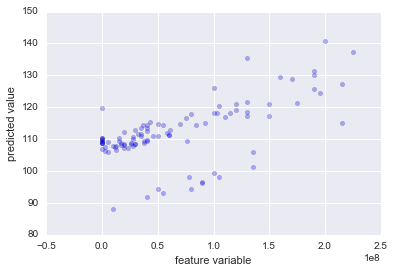

In [57]:
plt.scatter(X.iloc[:,1], y_pred, alpha = .3)
plt.xlabel('feature variable')
plt.ylabel('predicted value');

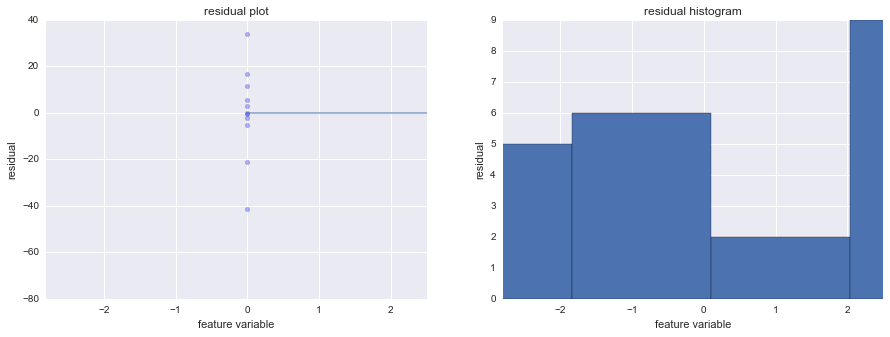

In [58]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(X.iloc[:,1],X.iloc[:,1]*0,alpha = .5)
plt.scatter(X.iloc[:,1], y_pred-y, alpha = .3)
plt.xlabel('feature variable')
plt.ylabel('residual')
plt.xlim([-2.8,2.5])
plt.title('residual plot');

plt.subplot(1,2,2)
plt.hist(y_pred-y,bins = 50)
plt.xlabel('feature variable')
plt.ylabel('residual')
plt.xlim([-2.8,2.5])
plt.title('residual histogram');

In [62]:

y = df.Runtime
X = pd.concat([df.tester, df.Budget, pd.get_dummies(df.Rating), df.DomesticTotalGross], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = sm.OLS(y_train, X_train) 
fit = model.fit()
y_pred = fit.predict(X_test)
score = metrics.r2_score(y_test, y_pred)
print score

-0.0785578788734
